In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

2023-07-25 08:57:40.834699: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 08:57:40.887505: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 08:57:40.888039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 08:57:41.964680: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using the dataset and visualizing the data

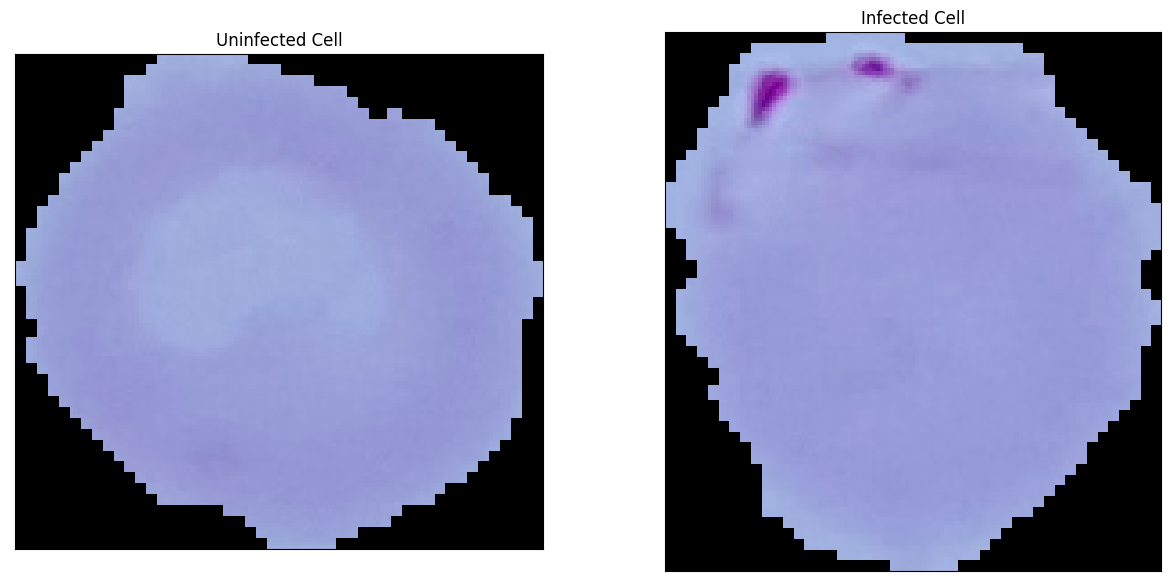

In [3]:
import cv2

upic='./input/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='./input/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

Setting image dimensions

In [4]:
width = 128
height = 128

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [6]:
trainDatagen = datagen.flow_from_directory(directory='./input/cell_images/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
valDatagen = datagen.flow_from_directory(directory='./input/cell_images/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [12]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/20


/tmp/ipykernel_243756/3717032350.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


1378/1378 [==============================] - 225s 162ms/step - loss: 0.4380 - accuracy: 0.7773 - val_loss: 0.2358 - val_accuracy: 0.9263
Epoch 2/20
1378/1378 [==============================] - 217s 157ms/step - loss: 0.1856 - accuracy: 0.9446 - val_loss: 0.1783 - val_accuracy: 0.9394
Epoch 3/20
1378/1378 [==============================] - 216s 157ms/step - loss: 0.1608 - accuracy: 0.9529 - val_loss: 0.1522 - val_accuracy: 0.9432
Epoch 4/20
1378/1378 [==============================] - 217s 157ms/step - loss: 0.1461 - accuracy: 0.9556 - val_loss: 0.1790 - val_accuracy: 0.9441
Epoch 5/20
1378/1378 [==============================] - 218s 158ms/step - loss: 0.1346 - accuracy: 0.9580 - val_loss: 0.1781 - val_accuracy: 0.9465


In [15]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

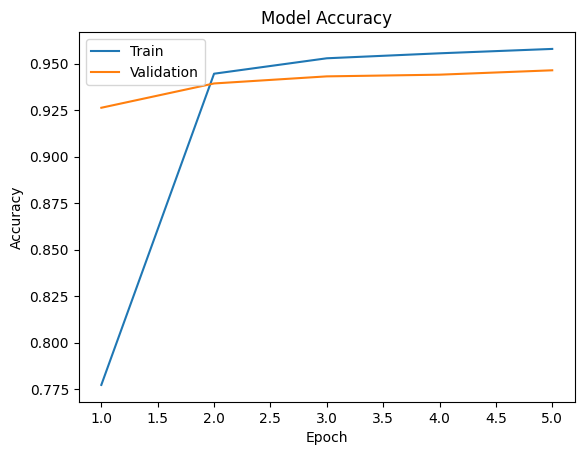

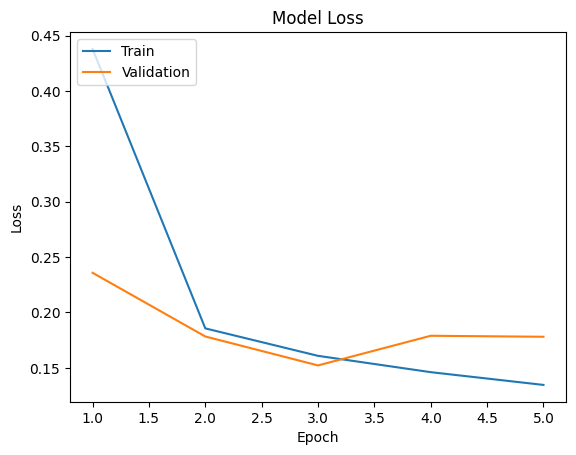

In [17]:
plotLearningCurve(history,5)

# Making Predictions

In [18]:
import os
#Making predictions 
img = "./input/cell_images/cell_images/Parasitized"

# Getting the first Four images 
ImgDir = list(os.listdir(img)) 
ImgDir = ImgDir[:3]

# Displaying the first 4 images in the Parasitized folder 
print(ImgDir)
print("_________________________________________________________________________")
print(""); 

# Loading Just a random image from the Parasitized images folder. 
imagePath = os.path.join(img, "C33P1thinF_IMG_20150619_120838a_cell_222.png")

# Displaying the full path to the parasitized image we want to use for prediction. 
print(imagePath)

['C86P47ThinF_IMG_20150820_125057_cell_220.png', 'C184P145ThinF_IMG_20151203_103114_cell_159.png', 'C39P4thinF_original_IMG_20150622_111206_cell_81.png']
_________________________________________________________________________

./input/cell_images/cell_images/Parasitized/C33P1thinF_IMG_20150619_120838a_cell_222.png


In [19]:
# Setting the batch size, number of epochs, the image height and width parameters 
batch_size = 2000
epochs = 20 
IMG_HEIGHT = 128
IMG_WIDTH = 128

Loaded Image Shape: (148, 145, 3)


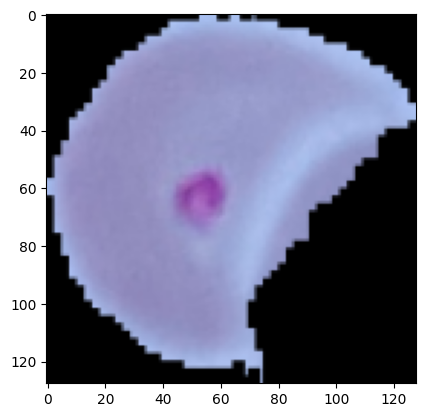

In [20]:
# Loading the image into memory 
img = cv2.imread(imagePath); 

# Setting the dimensions for the loaded image to be converted into and displaying the shape of the image 
print("Loaded Image Shape: {}".format(img.shape)); 
dim = (IMG_HEIGHT, IMG_WIDTH); 

# Resizing the image 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA); 
plt.grid(False) 
plt.imshow(img) 
plt.show()

In [21]:
# Expanding the image dimensions 
image = np.expand_dims(img, axis = 0); 

# Making Final Predictions 
result = model.predict(image)
# Creating a loop to get the actual predicted class 
for key, value in (trainDatagen.class_indices.items()): 
    if value == result: 
        print("The Predicted Class is: {}".format(key))

1/1 [==============================] - 0s 121ms/step
The Predicted Class is: Parasitized


In [ ]:
from sklearn.metrics import confusion_matrix

pred = np.argmax(result,axis = 1) 
y_true = np.argmax(valDatagen,axis = 1)

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
from sklearn.metrics import classification_report



print('{}'.format(classification_report(y_true , pred)))

model.save("malaria_model.h5")

import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, './tfjs')